# Missing Values

In [19]:
import pandas as pd


In [8]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [9]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [10]:
#filling null values using mode
df['salary'] = df['salary'].fillna(df['salary'].mode()[0])

In [11]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [12]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [13]:
#filling null values using Simple Imputer

In [14]:
import numpy as np
from sklearn.impute import SimpleImputer

In [17]:
# imputer object using mean strategy and
#missing_values type for imputation
imputer = SimpleImputer(missing_values = np.nan,strategy = 'mean')
data = [[12,np.nan,34],[10,32,np.nan],[np.nan,11,20]]
print("Orignal Data : \n",data)
#fitting the data to the imputer object

Orignal Data : 
 [[12, nan, 34], [10, 32, nan], [nan, 11, 20]]


In [18]:
imputer = imputer.fit(data)

#imputing the data
data = imputer.transform(data)
print("Imputed Data: \n", data)

Imputed Data: 
 [[12.  21.5 34. ]
 [10.  32.  27. ]
 [11.  11.  20. ]]


# Feature Encoding

## nominal encoding - order of data doesnt matter
   * one hot encoding
## ordinal encoding - order of data matters
   * label encoding

![](OneHotEncoding.png)

![](LabelEncoding.png)

# one hot encoding

In [23]:
# used for input or independent features

In [30]:
import pandas as pd
df= pd.read_csv('airports.csv')
df.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,506791,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,00AN,NaN,00AN,NaN,NaN,NaN


In [31]:
df['type'].value_counts()

small_airport     39642
heliport          19326
closed            10492
medium_airport     4751
seaplane_base      1155
large_airport       465
balloonport          49
Name: type, dtype: int64

In [32]:
pd.get_dummies(df,columns = ['type'])

,id,ident,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,...,home_link,wikipedia_link,keywords,type_balloonport,type_closed,type_heliport,type_large_airport,type_medium_airport,type_seaplane_base,type_small_airport
0,6523,00A,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,...,NaN,NaN,NaN,0,0,1,0,0,0,0
1,323361,00AA,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,...,NaN,NaN,NaN,0,0,0,0,0,0,1
2,6524,00AK,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,...,NaN,NaN,NaN,0,0,0,0,0,0,1
3,6525,00AL,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,...,NaN,NaN,NaN,0,0,0,0,0,0,1
4,506791,00AN,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,...,NaN,NaN,NaN,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75875,46378,ZZ-0001,Sealand Helipad,51.894444,1.482500,40.0,EU,GB,GB-ENG,Sealand,...,http://www.sealandgov.org/,https://en.wikipedia.org/wiki/Principality_of_...,Roughs Tower Helipad,0,0,1,0,0,0,0
75876,307326,ZZ-0002,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,AF,TF,TF-U-A,Grande Glorieuse,...,NaN,NaN,NaN,0,0,0,0,0,0,1
75877,346788,ZZ-0003,Fainting Goat Airport,32.110587,-97.356312,690.0,NaN,US,US-TX,Blum,...,NaN,NaN,NaN,0,0,0,0,0,0,1
75878,342102,ZZZW,Scandium City Heliport,69.355287,-138.939310,4.0,NaN,CA,CA-YT,(Old) Scandium City,...,NaN,NaN,"ZZZW, ZZZW, ZYW, YK96",0,1,0,0,0,0,0


In [ ]:
# see in the end of  data frame har feature ko encode kr krdia in numbers

# Label Encoding

In [24]:
# used for target features

In [40]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
# we want to encode species

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()

In [45]:
df['Species'] = le.fit_transform(df['Species'])

In [46]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


# Feature Scaling

In [47]:
# technique to standardize the independent feature present in the data in a fixed range.
# It is performed during the data pre-processing.
# most common techniques are normalization and standardization

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame({'WEIGHT':[15,18,12,10],
                  'PRICE':[1,3,2,5]},
                 index = ['Orange','Apple','Banana','Grape'])
print(df)
# values of weight is higher than the values of price. this can make an impact in the decision making of ML model

        WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5


### 1) min max Scaler

![](MinMaxScaler.png)

![](SCALER.png)

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [56]:
df1 = pd.DataFrame(scaler.fit_transform(df),
                  columns = ['WEIGHT','PRICE'],
                  index = ['Orange','Apple','Banana','Grape'])

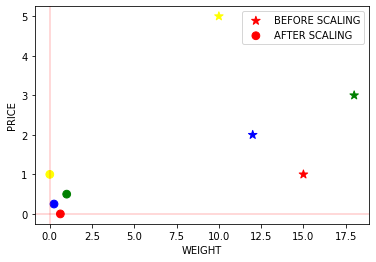

In [58]:
ax = df.plot.scatter(x = 'WEIGHT', y='PRICE',color = ['red','green','blue','yellow'],
                    marker = '*', s=80, label='BEFORE SCALING')
df1.plot.scatter(x = 'WEIGHT', y='PRICE',color = ['red','green','blue','yellow'],
                    marker = 'o', s=60, label='AFTER SCALING', ax=ax)
plt.axhline(0, color='red', alpha=0.2)
plt.axvline(0, color='red', alpha=0.2)


### 2) Standard scaler

![](StandardScaler.png)

In [59]:
# sigma is the standard deviation
#distribution is centered around zero and Std. dev. is 1

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [61]:
df2 = pd.DataFrame(scaler.fit_transform(df),
                  columns = ['WEIGHT','PRICE'],
                  index = ['Orange','Apple','Banana','Grape'])

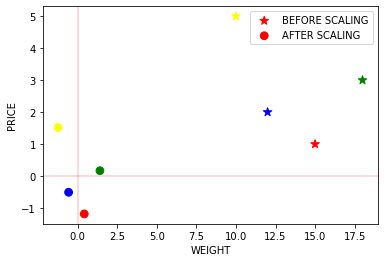

In [62]:
ax = df.plot.scatter(x = 'WEIGHT', y='PRICE',color = ['red','green','blue','yellow'],
                    marker = '*', s=80, label='BEFORE SCALING')
df2.plot.scatter(x = 'WEIGHT', y='PRICE',color = ['red','green','blue','yellow'],
                    marker = 'o', s=60, label='AFTER SCALING', ax=ax)
plt.axhline(0, color='red', alpha=0.2)
plt.axvline(0, color='red', alpha=0.2)


In [63]:
#we dont need to perform feature scaling on each ML algorithm (tree based algorithm e.g. random forest)
#KNN, clustering alogrithms and Neural networks, we need to do feature scaling everytime in each ML project